<a href="https://colab.research.google.com/github/PetrGavrilin/VKR_URFU/blob/main/VKR_part4_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>k ближайших соседей</h1>

In [12]:
import pandas as pd
import numpy as np

# импорт необходимых библиотек
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from sklearn.model_selection import GridSearchCV

import random

from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn

In [13]:
import sys
sys.path.append('/content')
from vkr_function import print_scores, plot_predict, my_features_extraction, my_test_train_split

In [14]:
Y = pd.read_csv('/content/flow_rate.csv')
X_tsfel = np.genfromtxt('/content/X_tsfel.csv', delimiter=',')
X_tsfel_savgol = np.genfromtxt('/content/X_tsfel_savgol.csv', delimiter=',')
X_tsfel_rol = np.genfromtxt('/content/X_tsfel_rol.csv', delimiter=',')
borders = pd.read_csv('/content/borders.csv').values.tolist()[0]

In [16]:
Y = np.array(Y['Et'])

In [37]:
X = np.array(X_tsfel)[1:]

In [38]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [58]:
# метод k ближайших соседей

k = 3
weights = 'distance'

# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsRegressor(n_neighbors=k,
                          weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.00022
RMSE: 0.01496
R2 : 0.99957


In [59]:
# Обучение модели и вывод метрик
y_predict=kNN.predict(X_test)
print_scores(y_test, y_predict)


Ошибка на тестовых данных
MSE: 0.00022
RMSE: 0.01496
R2 : 0.99957


In [60]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.00002
RMSE: 0.00470
R2 : 0.99996


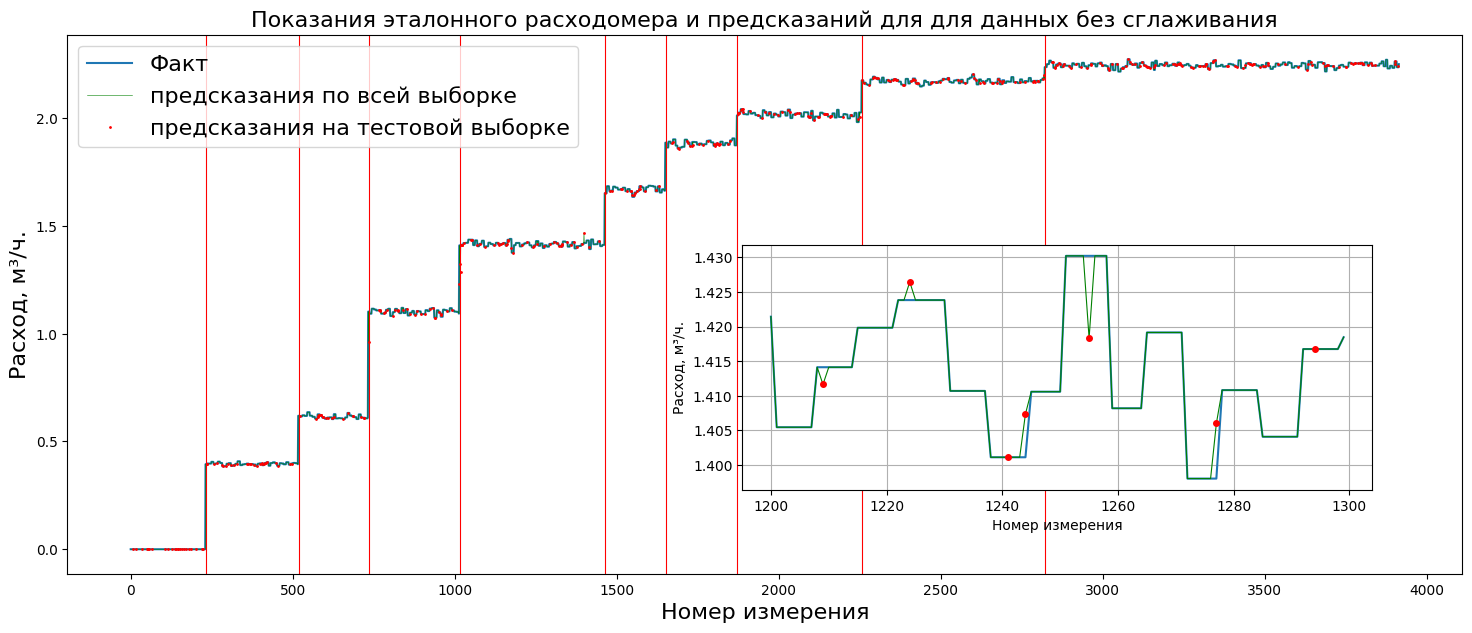

In [61]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных без сглаживания")

Модель показывает большую сходимость на тренировочных данных, но значительную ошибку на тестовых

Обучение модели на дополнительно обработанных данных с помощью функции Савицкого-Голея

In [62]:
X = np.array(X_tsfel_savgol)[1:]
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [63]:
# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.00009
RMSE: 0.00960
R2 : 0.99982


In [64]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.00001
RMSE: 0.00302
R2 : 0.99998


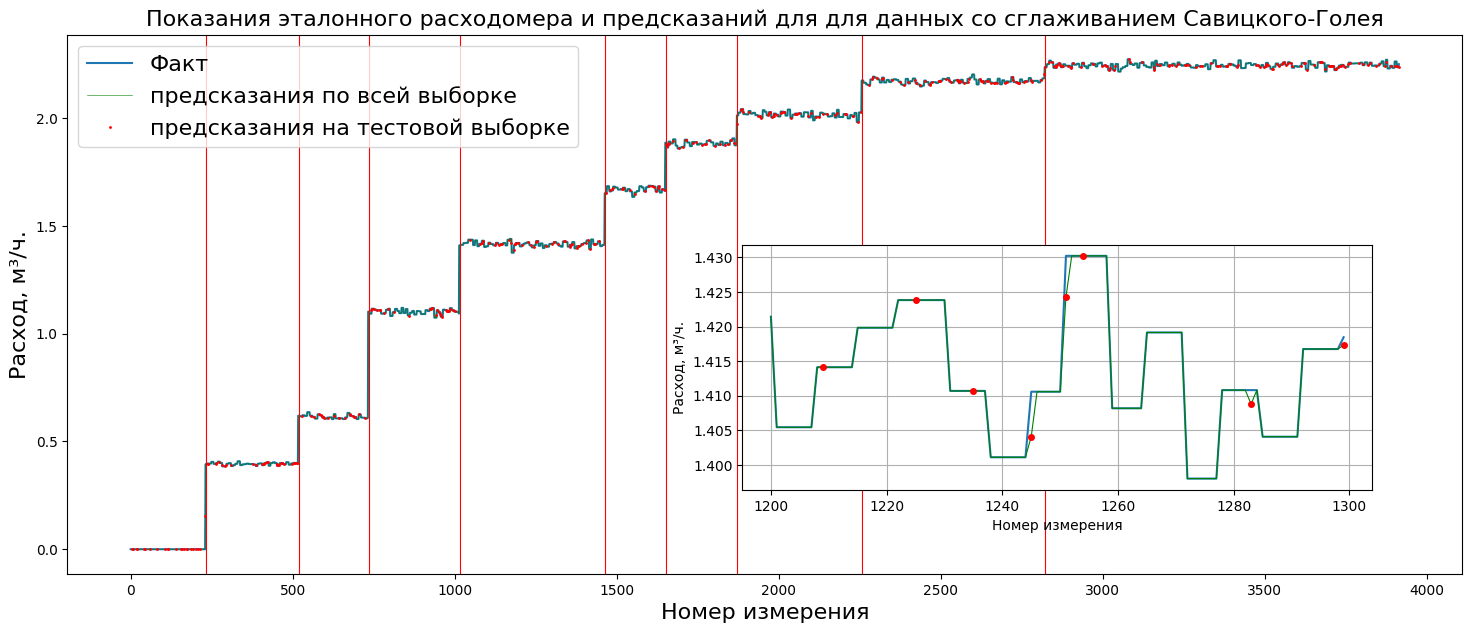

In [65]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со сглаживанием Савицкого-Голея")

Проверим работу модели, приняв за тестовую выборку один из режимов расхода

In [66]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [67]:
# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.05626
RMSE: 0.23719
R2 : -215.75371


In [68]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.00645
RMSE: 0.08032
R2 : 0.98752


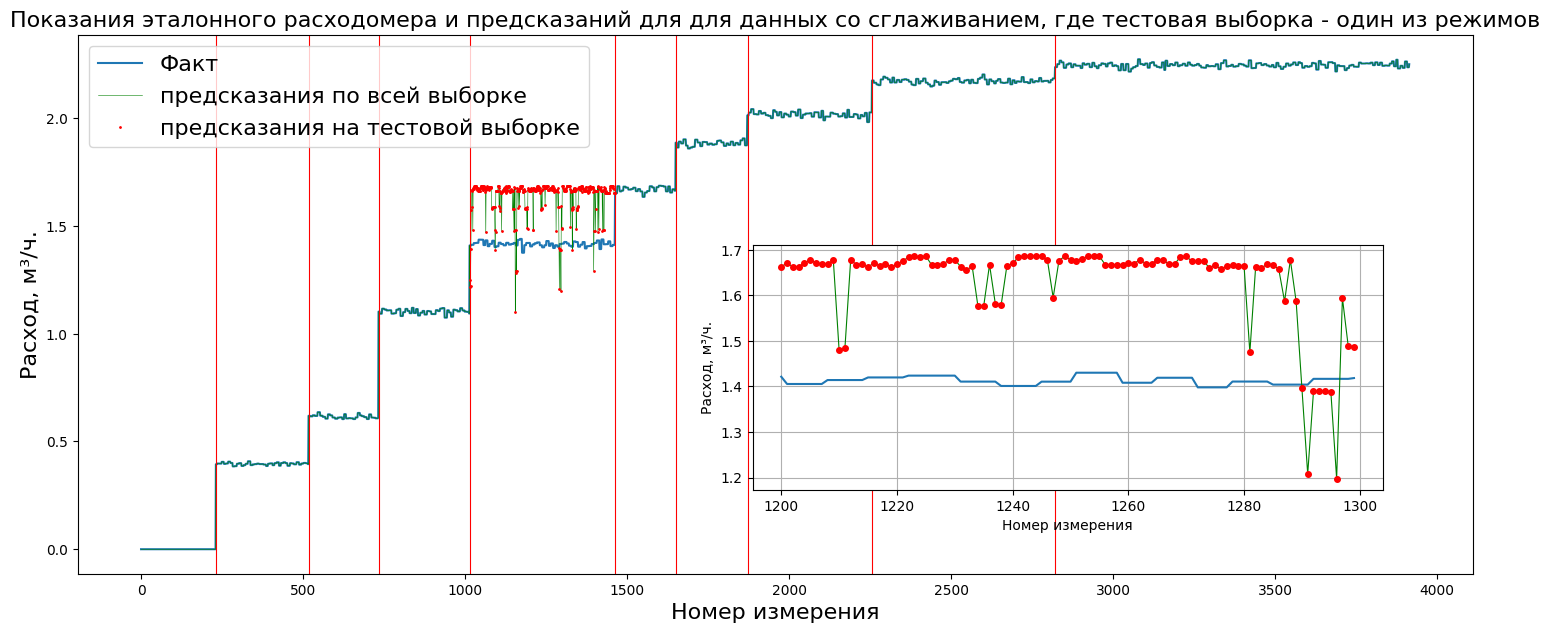

In [69]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со сглаживанием, где тестовая выборка - один из режимов")

При исключении одного режима из тренировочных данных предсказания на нём "цепляются" за соседний режим, что приводит к недопустимой ошибке.

In [70]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [71]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.6373614543470338

Построим моедель на данных со скользящим средним

In [72]:
X = np.array(X_tsfel_rol)[1:]

In [73]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [74]:
# Обучение модели и вывод метрик
kNN.fit(X_train, y_train)
y_predict = kNN.predict(X_test)
print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.00063
RMSE: 0.02518
R2 : 0.99877


In [75]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.00006
RMSE: 0.00792
R2 : 0.99988


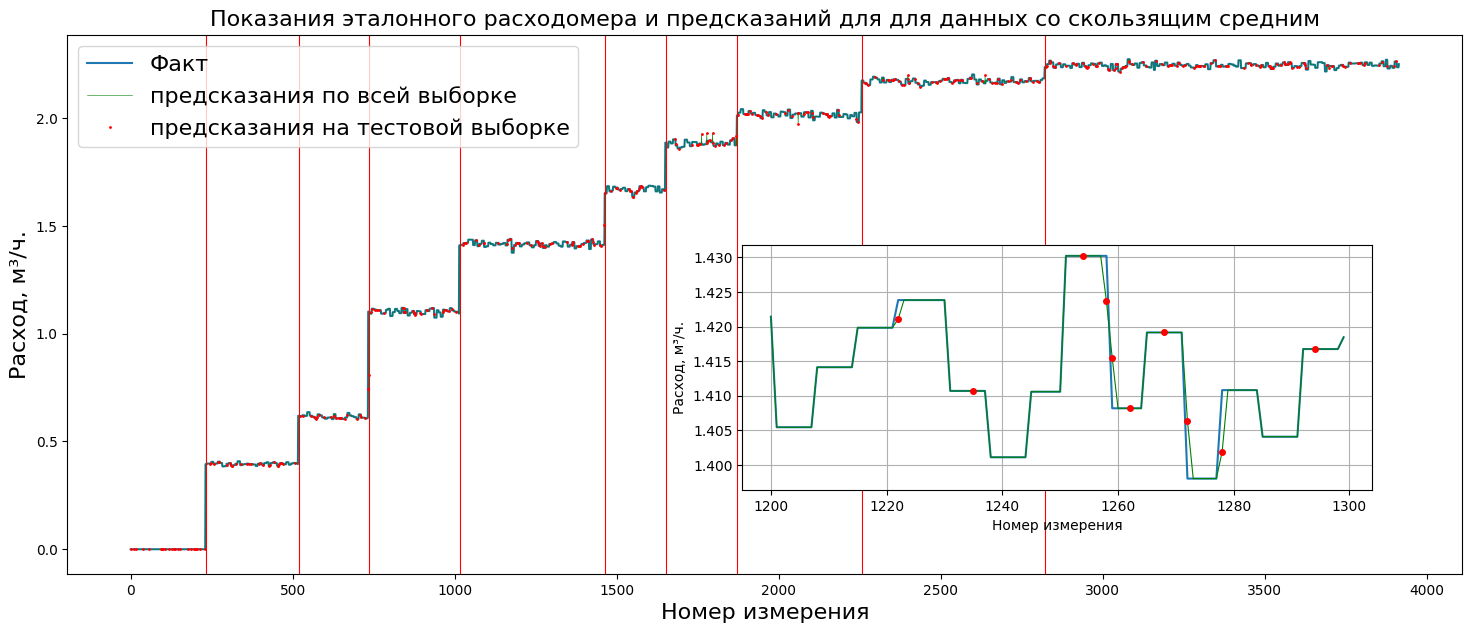

In [76]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со скользящим средним")